#Lab 3: Deep learning practical assignment

###**All imports we need**

In [ ]:
!pip install keras==2.7.0
!pip install matplotlib==3.2.2
!pip install numpy==1.19.5
!pip install sklearn
!pip install tensorflow==2.7.0

In [ ]:
 import numpy as np
 import tensorflow as tf
 import matplotlib.pyplot as plt
 import pandas as pd
 #load_data
 from sklearn.datasets import load_iris
 from sklearn.datasets import load_digits
 from sklearn.datasets import fetch_olivetti_faces
 #import_sklearn
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.preprocessing import LabelEncoder
 from keras.preprocessing.image import ImageDataGenerator
 #import_keras
 from keras.metrics import Precision , Recall
 from keras.models import Sequential
 from keras.utils import np_utils
 from keras.layers import ZeroPadding2D, Conv2D, Dense, Flatten, MaxPooling2D , Activation, Dropout, GlobalAveragePooling2D
 from keras import layers, models
 #import_tensorflow
 from tensorflow.keras.utils import to_categorical
 from tensorflow.keras.applications import vgg16

###**Using data augmantation technique and splitting the data to train and test**

Iris zeyda 5ATER mafihech tsawer wall ?

In [ ]:
#load iris data
data = load_iris()
target = data.target
#encode data
encoder = LabelEncoder()
encoder.fit(target)
encoded_Y = encoder.transform(target)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
#split data
X_train,X_test,y_train,y_test = train_test_split(data.data,dummy_y,test_size=0.2,  random_state=42)

model = Sequential()

# add layers to model

model.add(Dense(200,input_shape=(4,),activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['accuracy'])
# Fit the keras model on the dataset
epochs=50
history=model.fit(X_train, y_train, epochs =epochs, batch_size =10, verbose=0)
# Evaluate the keras model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 114ms/step - loss: 0.1055 - accuracy: 0.9000


[0.10554645955562592, 0.8999999761581421]

#### Digits

**Load the Dataset**

In [ ]:
#load digits data
digits=load_digits()
target = digits.target
images = digits.images

(1797, 8, 8)


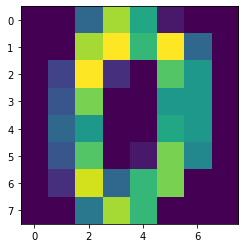

In [ ]:
print(images.shape)
plt.imshow(images[0])

**Preprocessing**

reshaped_data shape =  (1797, 28, 28, 1)
X_train shape =  (1437, 28, 28, 1)


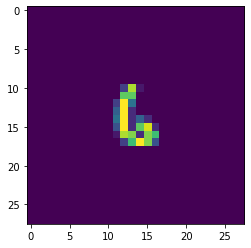

In [ ]:
digit_model_input_shape = (28,28,1)
digit_shape=8
# Reshape images
reshaped_data= digits.data.reshape(digits.data.shape[0],digit_shape,digit_shape,1)
# Zero Padding
padding_width = padding_height = (digit_model_input_shape[0]-digit_shape)//2
padding_shape = (padding_width,padding_height)
reshaped_data = np.pad(reshaped_data, [(0,0),padding_shape,padding_shape,(0,0)], 'constant',constant_values=0.)
print("reshaped_data shape = ",reshaped_data.shape)

#split and shuffle data
X_train_digits,X_test_digits,y_train_digits,y_test_digits = train_test_split(reshaped_data,target,test_size=0.2,  random_state=42)
print("X_train shape = ",X_train_digits.shape)
plt.imshow(tf.reshape(X_train_digits[0],[28,28]))

**Data Augmentation**

In [ ]:

datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1
            )
datagen.fit(X_train)
train_generator = datagen.flow(X_train_digits, y_train_digits)
test_generator = ImageDataGenerator().flow(X_test_digits, y_test_digits)
# Plotting augmented images
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = train_generator.next()
  image = batch[0][0].reshape(28,28)
  plt.imshow(image,cmap="gray")
# show the figure
plt.show()

#### Faces

**Load the Dataset**

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 64, 64)
(400, 4096)
*****  Some image samples ******


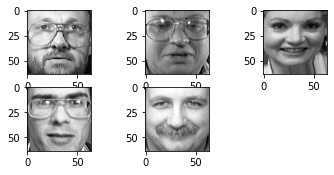

In [ ]:
#load olivetti data
olivetti=fetch_olivetti_faces(shuffle=True)
data = olivetti.data
target=olivetti.target
images=olivetti.images
faces_shape=64

print(images.shape)
print(data.shape)
print("*****  Some image samples ******")
# Plot first few images
for i in range(5):
  plt.subplot(330 + 1 + i)
  plt.imshow(images[i], cmap=plt.get_cmap('gray'))
plt.show()

**Preprocessing**

reshaped_faces_data shape =  (400, 64, 64, 1)
X_train shape =  (320, 64, 64, 1)
y_train shape =  (320,)
(320, 64, 64, 1)


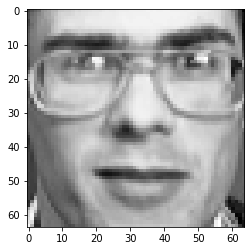

In [ ]:
reshaped_faces_data= data.reshape(data.shape[0],faces_shape, faces_shape,1)
reshaped_faces_data.shape
# No padding needed 
print("reshaped_faces_data shape = ",reshaped_faces_data.shape)
# Split and shuffle
X_train_faces, X_test_faces, y_train_faces, y_test_faces = train_test_split(reshaped_faces_data, target,test_size=0.2,random_state=42)
print("X_train shape = ",X_train_faces.shape)
print("y_train shape = ",y_train_faces.shape)

plt.imshow(tf.reshape(X_train_faces[0],[64,64]),cmap=plt.get_cmap('gray'))
print(X_train_faces.shape)

**Data Augmentation**

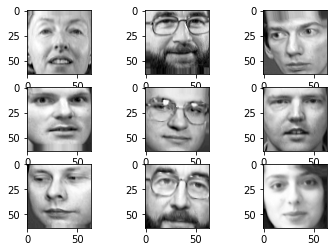

In [ ]:
datagen_face = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1
            )
datagen_face.fit(X_train_faces)
train_generator_faces = datagen_face.flow(X_train_faces, y_train_faces)
test_generator_faces = ImageDataGenerator().flow(X_test_faces, y_test_faces)

# Plotting augmented images
for i in range(9):
  plt.subplot(330 + 1 + i)
  batch = train_generator_faces.next()
  image = batch[0][0].reshape(64,64)
  plt.imshow(image,cmap="gray")
# show the figure
plt.show()

###**Implement some CNN architecture**




#### VGG16 Implementation

In [ ]:
def vgg_16_model(nb_labels,input_shape=(64,64,1)):
  model = Sequential()

  model.add(Conv2D(input_shape=input_shape ,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=nb_labels, activation="softmax"))
  return model

#### Use VGG 16 with faces dataset
---

In [ ]:
model=vgg_16_model(40,(88,88,3))
model.summary()
#run the model
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['accuracy',Precision(),Recall()])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 88, 88, 64)        1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 88, 88, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 44, 44, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 44, 44, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 44, 44, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 22, 22, 128)      0         
 g2D)                                                 

In [ ]:
def pretraitement(X,y):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  #Preprocessing dataset
  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
  y_train = to_categorical(y_train, num_classes = 40)
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
  y_test = to_categorical(y_test, num_classes = 40)

  X_train = tf.image.grayscale_to_rgb(tf.constant(X_train))
  X_test = tf.image.grayscale_to_rgb(tf.constant(X_test))
  X_train = tf.pad(X_train, ((0, 0), (12, 12), (12, 12), (0, 0)))
  X_test = tf.pad(X_test, ((0, 0), (12, 12), (12, 12), (0, 0)))
  return X_train, y_train,X_test,y_test

In [ ]:
X = olivetti['images']
y = olivetti['target']
X_train, y_train,X_test,y_test=pretraitement(X,y)
X_train = vgg16.preprocess_input(tf.cast(X_train, tf.float32))
X_test = vgg16.preprocess_input(tf.cast(X_test, tf.float32))

In [ ]:
X.shape

(400, 64, 64)

In [ ]:
X_train.shape

TensorShape([280, 88, 88, 3])

In [ ]:
history = model.fit(X_train,y_train,batch_size=64,epochs=150)

Epoch 1/50
10/10 [==============================] - 51s 5s/step - loss: 3.6801 - accuracy: 0.0219 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 51s 5s/step - loss: 3.6765 - accuracy: 0.0188 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 50s 5s/step - loss: 3.6745 - accuracy: 0.0219 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 50s 5s/step - loss: 3.6771 - accuracy: 0.0125 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 50s 5s/step - loss: 3.6751 - accuracy: 0.0281 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 50s 5s/step - loss: 3.6740 - accuracy: 0.0312 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 7/50
10/10 [==============================] - 50s 5s/step - loss: 3.6741 - accuracy: 0.0312 - precis

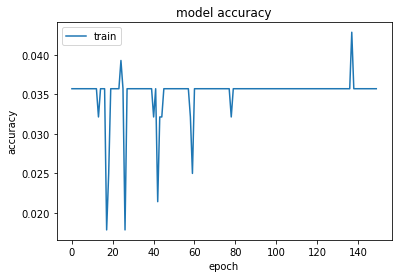

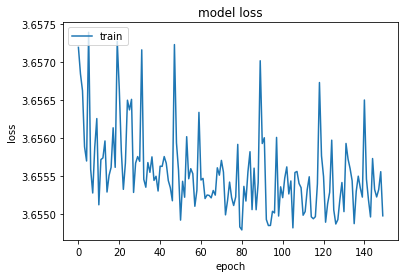

In [ ]:
  plt.plot(history.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

**Results :**
___
 So In this example, we can notice that the results given are not good and that this architecture is complexe and takes so much time during the training process. 

###**Find-tuning a pretrained model**

####Use VGG 16 with faces dataset
---

In [ ]:
#X = olivetti['images']
#y = olivetti['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_reshaped = to_categorical(y_train_faces, num_classes=40)
test_reshaped = to_categorical(y_test_faces, num_classes=40)
X_train=np.dstack([X_train_faces] * 3)
X_test=np.dstack([X_test_faces]*3)
X_train = X_train.reshape(-1, 64,64,3)
X_test= X_test.reshape(-1,64,64,3)

In [ ]:
X_train.shape

(320, 64, 64, 3)

In [ ]:

input_tensor=layers.Input(shape=(64,64,3))
vgg16_model=VGG16(weights='imagenet',input_tensor=input_tensor,include_top=False)
get_output_layer=vgg16_model.output
flatten_layer=layers.Flatten()(get_output_layer) 

# Add dense layer
dense1=layers.Dense(100,activation='relu')(flatten_layer)
dense2=layers.Dense(100,activation='relu')(dense1)
dense3=layers.Dense(100,activation='relu')(dense2)

output_layer=layers.Dense(40,activation='softmax')(dense3)
model=models.Model(inputs=input_tensor,outputs=output_layer)
for layer in model.layers[:-1]:
    layer.trainable=False
#fit the model
model.compile(loss ='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics =['accuracy',Precision(),Recall()])
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_63 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
history=model.fit (X_train, train_reshaped, validation_split=0.2, epochs=150)

Epoch 1/150
8/8 [==============================] - 2s 126ms/step - loss: 3.7599 - accuracy: 0.0195 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00 - val_loss: 3.7895 - val_accuracy: 0.0156 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00
Epoch 2/150
8/8 [==============================] - 0s 52ms/step - loss: 3.5602 - accuracy: 0.0898 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00 - val_loss: 3.7539 - val_accuracy: 0.0625 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00
Epoch 3/150
8/8 [==============================] - 0s 46ms/step - loss: 3.4675 - accuracy: 0.1250 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00 - val_loss: 3.7568 - val_accuracy: 0.0156 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00
Epoch 4/150
8/8 [==============================] - 0s 47ms/step - loss: 3.3861 - accuracy: 0.2188 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00 - val_loss: 3.6916 - val_accuracy: 0.0469 - val_precision_15: 0.0000e+00 - val_recall_15: 0.0000e+00

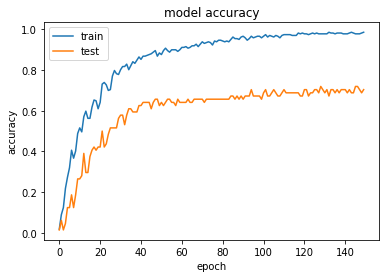

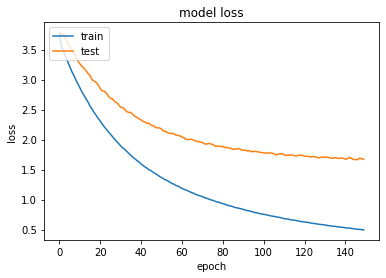

In [ ]:
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,test_reshaped)

3/3 [==============================] - 1s 47ms/step - loss: 1.6587 - accuracy: 0.6250 - precision_15: 0.9355 - recall_15: 0.3625


[1.6586697101593018, 0.625, 0.9354838728904724, 0.36250001192092896]

Using Transfer Learning with VGG16 we arrived at a better result overall with

 trainig accuracy = 99%\
 testing accuracy = 62%